Breast Cancer Wisconsin (Diagnostic) Data Set

! pip install keras

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output

#





In [3]:
# Read the data file

data = pd.read_excel('minibatch.xlsx')
data.head()


,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,minibatch
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


In [4]:
# Cleaning and modifying the data
data = data.drop('Unnamed: 0',axis=1)
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:23]))
datas.columns = list(data.iloc[:,1:23].columns)
datas['minibatch'] = data['minibatch']
# Creating the high dimensional feature space X
data_drop = datas.drop('minibatch',axis=1)
X = data_drop.values



## Bulding CNN

### keras + Dense + Dropout

In [5]:
# Create a feed forward neural network with 3 hidden layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
history=model1.fit(X, datas['minibatch'], batch_size=5, epochs=10,validation_split=0.33)




C:\Users\TOSHIBA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
327/327 [==============================] - 3s 4ms/step - loss: 0.0612 - accuracy: 0.9749 - val_loss: 0.0185 - val_accuracy: 0.9925
Epoch 2/10
327/327 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9920 - val_loss: 0.0289 - val_accuracy: 0.9888
Epoch 3/10
327/327 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9926 - val_loss: 0.0305 - val_accuracy: 0.9888
Epoch 4/10
327/327 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9933 - val_loss: 0.0237 - val_accuracy: 0.9913
Epoch 5/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 6/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0073 - accuracy: 0.9969 - val_loss: 0.0288 - val_accuracy: 0.9925
Epoch 7/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0200 - val_accuracy: 0.9900
Epoch 

In [6]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,033
Trainable params: 8,033
Non-trainabl

pip install visualkeras

In [7]:
import visualkeras

In [8]:
visualkeras.layered_view(model1)

In [10]:
# Cross validation analysis 
from sklearn.model_selection import StratifiedKFold
# fix random seed for reproducibility
seed = 3
np.random.seed(seed)
# K fold cross validation (k=2)
k = 2
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
cvscores = []
Y = datas['minibatch']
for train, test in kfold.split(X, Y):
    # Fit the model
    model1.fit(X[train], Y[train], epochs=30, batch_size=10, verbose=0)
    # evaluate the model
    scores = model1.evaluate(X[test], Y[test], verbose=0)
    # Print scores from each cross validation run 
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%d-fold cross validation accuracy -  %.2f%% (+/- %.2f%%)" % (k,np.mean(cvscores), np.std(cvscores)))

2-fold cross validation accuracy -  99.79% (+/- 0.12%)


In [11]:
# Create a feed forward neural network with 3 hidden layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD

model2 = Sequential()
model2.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
model2.add(Dropout(0.25))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['Precision'])

# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
history=model2.fit(X, datas['minibatch'], batch_size=5, epochs=10,validation_split=0.33)


Epoch 1/10


C:\Users\TOSHIBA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


327/327 [==============================] - 3s 5ms/step - loss: 0.0724 - precision: 0.9123 - val_loss: 0.0185 - val_precision: 0.9933
Epoch 2/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0172 - precision: 0.9821 - val_loss: 0.0176 - val_precision: 0.9960
Epoch 3/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0148 - precision: 0.9786 - val_loss: 0.0205 - val_precision: 0.9960
Epoch 4/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0076 - precision: 0.9964 - val_loss: 0.0220 - val_precision: 0.9960
Epoch 5/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0123 - precision: 0.9857 - val_loss: 0.0276 - val_precision: 0.9960
Epoch 6/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0100 - precision: 0.9928 - val_loss: 0.0229 - val_precision: 0.9960
Epoch 7/10
327/327 [==============================] - 1s 4ms/step - loss: 0.0128 - precision: 0.9857 - val_loss: 0.0280 - val_precision: 0.9959
Epo

In [12]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2816      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,033
Trainable params: 8,033
Non-traina

In [13]:
visualkeras.layered_view(model2)

In [14]:
from PIL import ImageFont


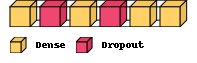

In [15]:
visualkeras.layered_view(model2, legend=True)

## Bulding CNN

### keras + Conv2D + MaxPooling2D

In [17]:
from tensorflow import keras
from tensorflow.keras import layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [18]:
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

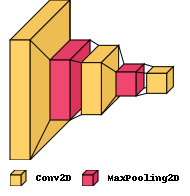

In [19]:
visualkeras.layered_view(model, legend=True)

# Plots of Accuracy and Loss

In [22]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

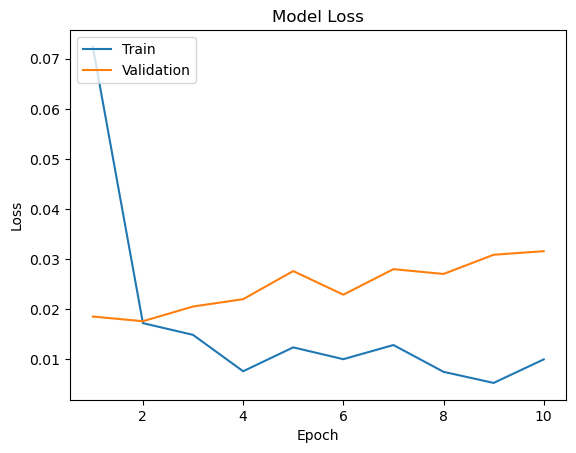

In [23]:
plotLearningCurve(history,10)

In [20]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['Accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()


In [ ]:
plotLearningCurve(history,10)

In [4]:
# Read the data file

data = pd.read_excel('minibatch.xlsx')
data.head()

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,minibatch
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


In [5]:
# Cleaning and modifying the data
data = data.drop('Unnamed: 0',axis=1)

# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:23]))
datas.columns = list(data.iloc[:,1:23].columns)
datas['minibatch'] = data['minibatch']

# Creating the high dimensional feature space X
data_drop = datas.drop('minibatch',axis=1)
X = data_drop.values
Y=data['minibatch'] 

In [6]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: minibatch, Length: 2435, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [ ]:
#1 Lyer

In [6]:
from tensorflow import keras
from tensorflow.keras import layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#2 Lyer

In [25]:
#create model
model = Sequential()

#add model layers
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [16]:
#3 Lyer

In [9]:
model1 = Sequential()
model1.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,validation_split=0.33)

Epoch 1/10
58/58 [==============================] - 2s 11ms/step - loss: 0.2709 - accuracy: 0.9244 - val_loss: 0.0350 - val_accuracy: 0.9852
Epoch 2/10
58/58 [==============================] - 0s 6ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0279 - val_accuracy: 0.9852
Epoch 3/10
58/58 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 0.9852
Epoch 4/10
58/58 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.0256 - val_accuracy: 0.9852
Epoch 5/10
58/58 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.0249 - val_accuracy: 0.9901
Epoch 6/10
58/58 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0254 - val_accuracy: 0.9885
Epoch 7/10
58/58 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0249 - val_accuracy: 0.9885
Epoch 8/10
58/58 [=

In [26]:

#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,validation_split=0.33)


#train model
#model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,validation_split=0.33)
history=model.fit(X, datas['minibatch'], batch_size=5, epochs=10,validation_split=0.33)

In [10]:
#show predictions for the first 3 images in the test set
model1.predict(X_test[:4])


1/1 [==============================] - 0s 196ms/step


array([[1.0000000e+00],
       [4.2464503e-06],
       [9.9999976e-01],
       [1.0000000e+00]], dtype=float32)

In [11]:
#show actual results for the first 3 images in the test set
y_test[:4]

1578    1
876     0
2374    1
2324    1
Name: minibatch, dtype: int64